# Tasca M9 T01
- Exercicis d'anàlisi de sentiment i textos.
- Exercici 1: Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [4]:
with open('chimananda_speech_entero.txt', 'r',encoding='utf-8') as file:
    texto = file.read()

Texto estraído del discurso de Chimamanda Ngozi Adichie titulado “We Should All Be Feminists“ en TEDxEuston conference.

https://singjupost.com/we-should-all-be-feminists-by-chimamanda-ngozi-adichie-full-transcript/?singlepage=1

In [5]:
#palabras en minuscula
texto = texto.lower()

La función **word_tokenize** toma una cadena de texto como entrada y devuelve una lista de palabras individuales, también conocidas como tokens. La tokenización es un paso esencial en el procesamiento del lenguaje natural, ya que permite descomponer el texto en unidades más pequeñas (palabras) para análisis posteriores.

In [6]:
tokenized_review = nltk.word_tokenize(texto)
tokenized_review

['my',
 'brother',
 'chuks',
 'and',
 'my',
 'best',
 'friend',
 'ike',
 'are',
 'part',
 'of',
 'the',
 'organizing',
 'team',
 ',',
 'and',
 'so',
 'when',
 'they',
 'ask',
 'me',
 'to',
 'come',
 ',',
 'i',
 'couldn',
 '’',
 't',
 'say',
 'no',
 '.',
 'but',
 'i',
 '’',
 'm',
 'so',
 'happy',
 'to',
 'be',
 'here',
 '.',
 'what',
 'a',
 'fantastic',
 'team',
 'of',
 'people',
 'who',
 'care',
 'about',
 'africa',
 '.',
 'i',
 'feel',
 'so',
 'humble',
 'and',
 'so',
 'happy',
 'to',
 'be',
 'here',
 '.',
 'and',
 'i',
 '’',
 'm',
 'also',
 'told',
 'that',
 'the',
 'most',
 'beautiful',
 ',',
 'most',
 'amazing',
 'little',
 'girl',
 'in',
 'the',
 'world',
 'is',
 'in',
 'the',
 'audience',
 '.',
 'her',
 'name',
 'is',
 'kamzia',
 'adichie',
 'and',
 'i',
 'want',
 'her',
 'to',
 'stand',
 'up…',
 'she',
 '’',
 's',
 'my',
 'niece',
 '!',
 'so',
 ',',
 'i',
 'would',
 'like',
 'to',
 'start',
 'by',
 'telling',
 'you',
 'about',
 'one',
 'of',
 'my',
 'greatest',
 'friends',
 ',',

Se extraen todas las palabras y caracteres que aparecen en el texto en formato de lista.

In [7]:
#frecuencia de las palabras usadas
frequency = FreqDist(tokenized_review)
print(frequency.most_common(20))

[(',', 270), ('.', 216), ('the', 176), ('to', 163), ('i', 151), ('a', 143), ('and', 140), ('of', 103), ('’', 89), ('that', 88), ('we', 74), ('is', 73), ('in', 72), ('was', 55), ('but', 52), ('it', 52), ('be', 50), ('not', 50), ('“', 45), ('”', 45)]


Se calcula la frecuencia de caracteres del texto. Pero el resultado obtenido no es óptimo ya qye hay muchos signos de puntuación, preposiciones y conjunciones. Lo que serian las llamadas "stop words" muy frecuentes en el lenguaje pero que no aportan significado ni uso para el análisis de sentimiento.

# Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [8]:
stop_words = set(stopwords.words('english'))
filtered_words = [element.lower() for element in tokenized_review if element not in stop_words and element.isalpha()]

frequency = FreqDist(filtered_words)
frequency

FreqDist({'man': 40, 'men': 32, 'women': 28, 'would': 25, 'woman': 23, 'gender': 22, 'know': 19, 'feminist': 18, 'say': 17, 'boys': 14, ...})

Por ello se utiliza **stopwords** y **isalpha** que eliminan tanto las conjunciones, preposiciones como los signos de puntuación y caracteres no alfabéticos. Para así obtener únicamente las palabras usadas en el texto. 

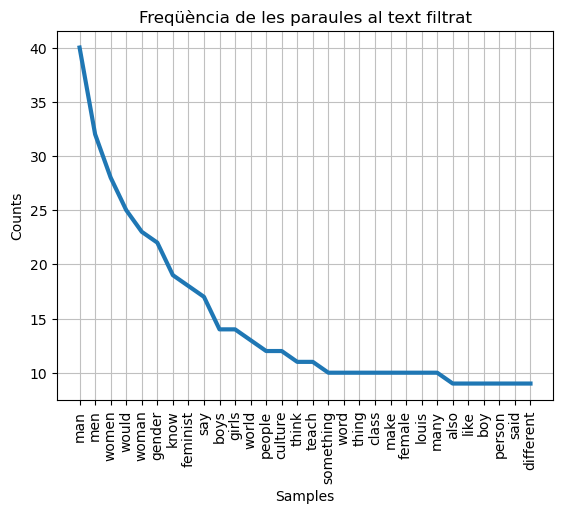

In [9]:
#Frecuencia de palabra del texto filtrado
freq_dist_filtered = FreqDist(filtered_words)

freq_dist_filtered.plot(30, cumulative=False, linewidth = 3, title='Freqüència de les paraules al text filtrat')
plt.show()

frequency = FreqDist(filtered_words)
print(frequency)

Las palabras "man", "woman", "gender", "feminist", "feminism" son las más frecuentes, lo que indica que el discurso se centra en el ámbito de la igualdad de género y el feminismo. La alta frecuencia de las palabras "man" y "woman" nos pueden indicar que una gran parte del discurso probablemente se enfoca en la comparación de roles y expectativas de diferentes géneros haciendo gran énfasis y generando más importancia en lo que el hombre y los hombres hacen o tienen, dejando en segundo plano lo que debería (por la frecuencia de la palabra "would") ser para la mujer y las mujeres. A pesar de esto, las palabras "gender" y "feminist" apuntan a que se trata de un discurso que aboga por el feminismo y la discusión sobre los roles de género. Palabras como "we", "world", y "story" sugieren que el discurso podría estar contando historias personales o colectivas para ilustrar puntos sobre el feminismo y la equidad de género. La palabra "should" puede indicar un llamado a la acción o una recomendación para el público o la sociedad en general. En cambio, palabras como "problem", "different", y "like" pueden estar asociadas con la discusión de problemas sociales y comparaciones o ejemplos de cómo se manifiestan las diferencias de género en la sociedad. El uso frecuente de palabras como "same", "make", y "know" podría indicar un tono informativo y educativo, probablemente diseñado para cambiar percepciones y fomentar la igualdad. 

También destacar que contabiliza los nombres propios, por ejemplo louis, al pasar todas las palabras a minúscula, la considera una palabra más a contabilizar. El nombre "lois" es una persona específica que se menciona como parte de las anécdotas que narra Chimamanda en todo su discurso. La nombra a lo largo del discurso, a modo de comparación entre la visión masculina, en este caso de lois y la visión de Chimamanda, en este caso femenina del sesgo de género.

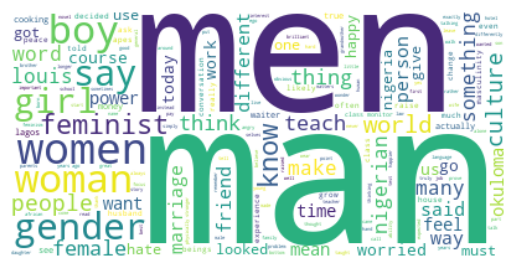

In [10]:
from wordcloud import WordCloud

tmp=' '.join(filtered_words)
wordcloud = WordCloud(background_color='white')
wordcloud.generate(tmp)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Tanto en la frecuencia, como claramente muestra la imagen. Hay palabras que se parecen como man/men en singular y plural, que se repiten en numerosas ocasiones pero se cuentan por separado.

Para ello usaremos la herramienta'PorterStemmer'. El stemming es un proceso en el procesamiento del lenguaje natural que implica reducir las palabras a su raíz o base al eliminar afijos o sufijos. La finalidad es simplificar las palabras a su forma base, logrando que palabras similares, pero con variaciones gramaticales o derivaciones, se representen de manera uniforme. De este modo, se busca consolidar palabras relacionadas bajo una forma común, generando incluso palabras no reales, lo que facilita el análisis y la comparación de texto.
Para poder contar las palabras como una, cosa que beneficiará nuestro análisis. 

Número de palabras únicas después de stemming:735



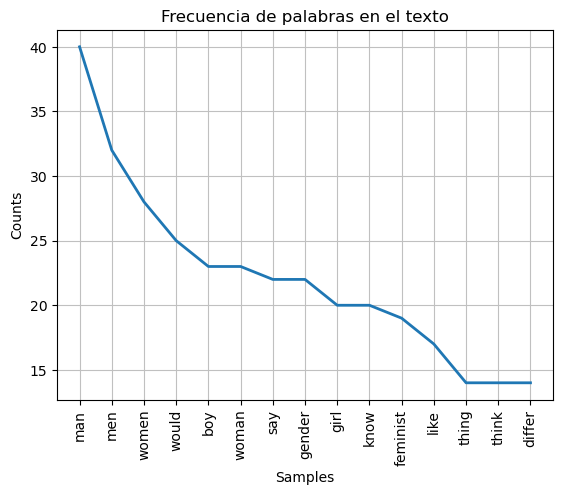

In [11]:
ps = PorterStemmer()
filtered_words = [ps.stem(word) for word in filtered_words]
filtered_words1 = FreqDist(filtered_words)
print(f"Número de palabras únicas después de stemming:{len(filtered_words1)}\n")

filtered_words1.plot(15, cumulative=False, title='Frecuencia de palabras en el texto');

PorterStemmer() no considerar man y men como palabras con la misma raíz, por lo que no las junta.Si que ha juntado palabras como boy/boys, que también son singular/plural pero únicamente añadiendo una s.
palabras únicas después de stemming:735

En conclusión, se busca otra herramienta que consiga hacerlo. Por ejemplo, la lematización. Que intentará reducir las palabras a su forma base, lo que puede ayudar a preservar mejor el significado original. La lematización puede ser más lenta que el stemming debido a su naturaleza más compleja.

El objetivo de la lematización es mantener la coherencia semántica al reducir las palabras a formas base que aún tengan significado.

Número de palabras únicas después de lematización: 733



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aloha_nn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


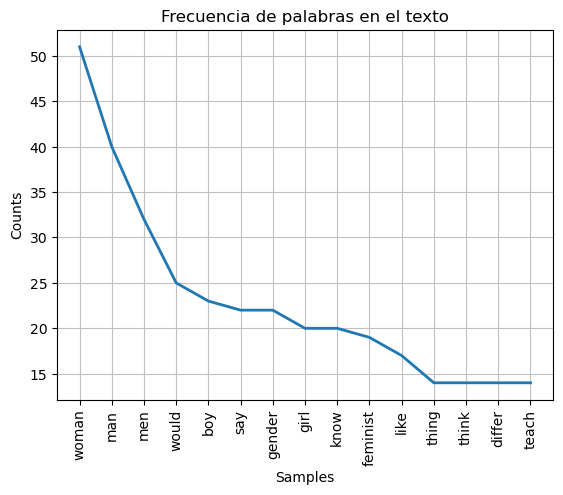

<AxesSubplot:title={'center':'Frecuencia de palabras en el texto'}, xlabel='Samples', ylabel='Counts'>

In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

# Descargar el recurso WordNet
nltk.download('wordnet')

# Crear el lematizador
lemmatizer = WordNetLemmatizer()

# Aplicar lematización a tus palabras filtradas
filtered_words_lemmatized = [lemmatizer.lemmatize(word) for word in filtered_words]

# Crear la frecuencia de palabras después de lematización
filtered_words1 = FreqDist(filtered_words_lemmatized)

# Imprimir el número de palabras únicas después de lematización
print(f"Número de palabras únicas después de lematización: {len(filtered_words1)}\n")

# Visualizar la frecuencia de palabras después de lematización
filtered_words1.plot(15, cumulative=False, title='Frecuencia de palabras en el texto')


El resultado es bueno, se consiguen unificar woman y women pero no man y men. Woman se pone en cabeza en frecuencia de palabras usadas en el speech de Chimamanda. Seguido de man y men que no los unifica considerandolos palabras diferentes. Podría ser debido a que se trata de una palabra muy corta, normalmente cambiando una letra podría significar otra cosa distinta. 

Además teniendo en cuenta el número de palabras únicas después de lematización: 733, únicamente 2 palabras por debajo del PorterStemmer. Por lo que implicará que hay palabras que porterstemmer agrupa que no lo hace la lematización.

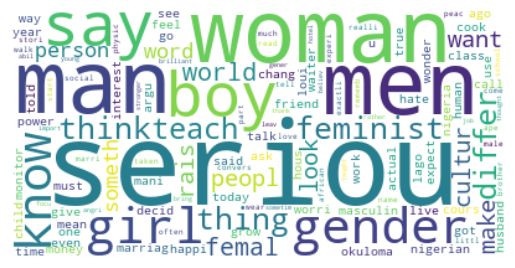

In [22]:
from wordcloud import WordCloud

tmp=' '.join(filtered_words1)
wordcloud = WordCloud(background_color='white')
wordcloud.generate(tmp)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Visualmente se detecta la variabilidad en las palabras del discurso deChimamanda, la mayoría de ellas neutrales. Algunas se han quedado en la raíz de la palabra, ya que hemos aplicado diferentes filtros.

# Exercici 3
- Realitza sentiment analysis al teu conjunt de dades.

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

processed_review = ' '.join(filtered_words1)
sentiment_analyzer = SentimentIntensityAnalyzer()
sentiment = sentiment_analyzer.polarity_scores(processed_review)

print(sentiment)

{'neg': 0.133, 'neu': 0.687, 'pos': 0.18, 'compound': 0.9906}


**'neg': 0.133:** Indica la proporción de negatividad en el texto. En este caso, el valor de 0.133 es relativamente bajo, sugiriendo que hay una baja presencia de contenido negativo en el texto.

**'neu': 0.687:** Representa la proporción de neutralidad en el texto. Con un valor de 0.687, implica que una parte considerable del texto es neutral.

**'pos': 0.18:** Muestra la proporción de positividad en el texto. Aquí, el valor de 0.18 indica que hay una presencia moderada de contenido positivo en el texto.

**'compound': 0.9906:** El puntaje compuesto es una medida agregada de la polaridad que combina los valores anteriores. Al ser 0.9906, indica una fuerte tendencia positiva en el texto.

En resumen, el análisis sugiere que el texto tiene una orientación principalmente positiva, con una pequeña proporción de negatividad y una parte considerable de contenido neutro. El puntaje compuesto cercano a 1 refuerza la idea de que el texto es positivo en general.

In [21]:
# Clasificación del sentimento
score = sentiment['compound']

if score >= 0.05:
    sentiment = "Positivo"
elif compound_score <= -0.05:
    sentiment = "Negativo"
else:
    sentiment = "Neutro"

print(f'\nPuntuación del sentimento: {score}')
print(f'Clasificación de sentimento: {sentiment}')


Puntuación del sentimento: 0.9906
Clasificación de sentimento: Positivo


En conclusión, el discurso de Chimamanda se clasifica como positivo en un 0.99. El análisis muestra como la diversidad de las palabras, la mayoria de ellas neutras indican que Chimamanda trata de exponer sus argumentos de la manera más objetiva. Por ello el discurso de Chimamanda es tan poderoso, porque explica de manera neutral los sesgos de género de la sociedad. 